Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
STUDENT_ID = ""

---

# MTH765P - Coursework 3
This is a template notebook for the third coursework assignment for MTH765P,
Closely follow the instructions in this template in order 
to complete the assessment and to obtain full marks. Please only
modify cells where you are instructed to do so. Note that you may add other cells.
Failure to comply may result in unexpected errors that can lead to mark deductions. **Please submit only this file, without changing its name to QMPlus.**


##### DO NOT FORGET TO REMOVE THE LINE  _raise NotImplementedError()_ after you answer the question.

Author: Primoz Skraba


As usual, we begin by loading the necessary libraries. You should not 
import any other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


---------
---------
 
 1.) Linear models and residuals

--------
--------

Run the next cell to load the first dataset.

--------




In [ ]:
X = pd.read_csv('1.csv',sep=' ')
X.head()

----

a.) Use _numpy.polyfit()_ to fit a linear model to the data, storing the parameters into variables called _m_ and _b_ respectively for the slope and y-intercept. 

----

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

----

b.) Compute the residual of the data with respect to the model and store them in a variable called _res_

----

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

----

c.) Plot an unnormalised histogram of the residuals with 40 bins

----

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

----

d.) Is the linear model a good fit? (one or two sentences)

----

YOUR ANSWER HERE

----

e.) Complete the function below to compute hinges of the input x, which should be set at the 30th and 70th quantile.

----

In [ ]:
def hinges(x):
# YOUR CODE HERE
raise NotImplementedError()
    return lower,upper

----

f.) Use the above function to compute the inner fences of the residuals. Store the results in the variables _lower_fence_ and _upper_fence_ respectively.

----

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

----

g.) Create a new Dataframe called _Y_ with all the values corresponding to residuals which are beyond the inner fences removed.

----

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
Y

----

h.) Fit a new linear model and plot the  outliers as red points, the remainder of the points (non-outliers) as blue stars (\*), the original model as a black line and the new model shown as a green line. Store the new model parameters in the variables _m\_new_ and _b\_new_.

----

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

----

j.) Is what you did above different from computing (and filtering) the outliers on the original data? If so, describe how, otherwise explain why they are the same. (a few sentences)

----

YOUR ANSWER HERE

### 2.)

The next dataset is on the sales of video games. 

---------
---------

a.) Use pandas to read in the file **games.csv** into a dataframe called _games_



In [97]:
games = pd.read_csv('2.csv')
games.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37


 ----
 
a.) Find answers to the following questions about the dataframe.
- How many genres are there? Store the answer in a variable called _num_genres_. 
- How many publishers are there? Store the answer in a variable _num_publishers_.
- How many platforms are there? Store the answer in a variable _num_platforms_.

----


In [99]:
# finding the count of genres
num_genres = len(games["Genre"].unique())

# finding the number of publishers
num_publishers = len(games["Publisher"].unique())

# finding the number of platforms
num_platforms = len(games["Platform"].unique())

In [100]:
num_genres, num_publishers, num_platforms

(12, 579, 31)

----

b.) Create a box-and-whisker plot of Global Sales by genre.

----

Sports 0.01 82.74 998.1975 332.7325
Platform 0.01 40.24 623.5275 207.8425
Racing 0.01 35.82 549.03 183.01
Role-Playing 0.01 31.37 695.5275 231.8425
Puzzle 0.01 30.26 183.71249999999998 61.2375
Misc 0.01 29.02 607.4700000000001 202.49000000000004
Shooter 0.01 28.31 778.0275000000001 259.34250000000003
Simulation 0.01 24.76 294.1500000000001 98.05000000000003
Action 0.01 21.4 1313.385 437.795
Fighting 0.01 13.04 336.6825 112.2275
Adventure 0.01 11.18 179.27999999999997 59.75999999999999
Strategy 0.01 5.45 131.34000000000003 43.78000000000001


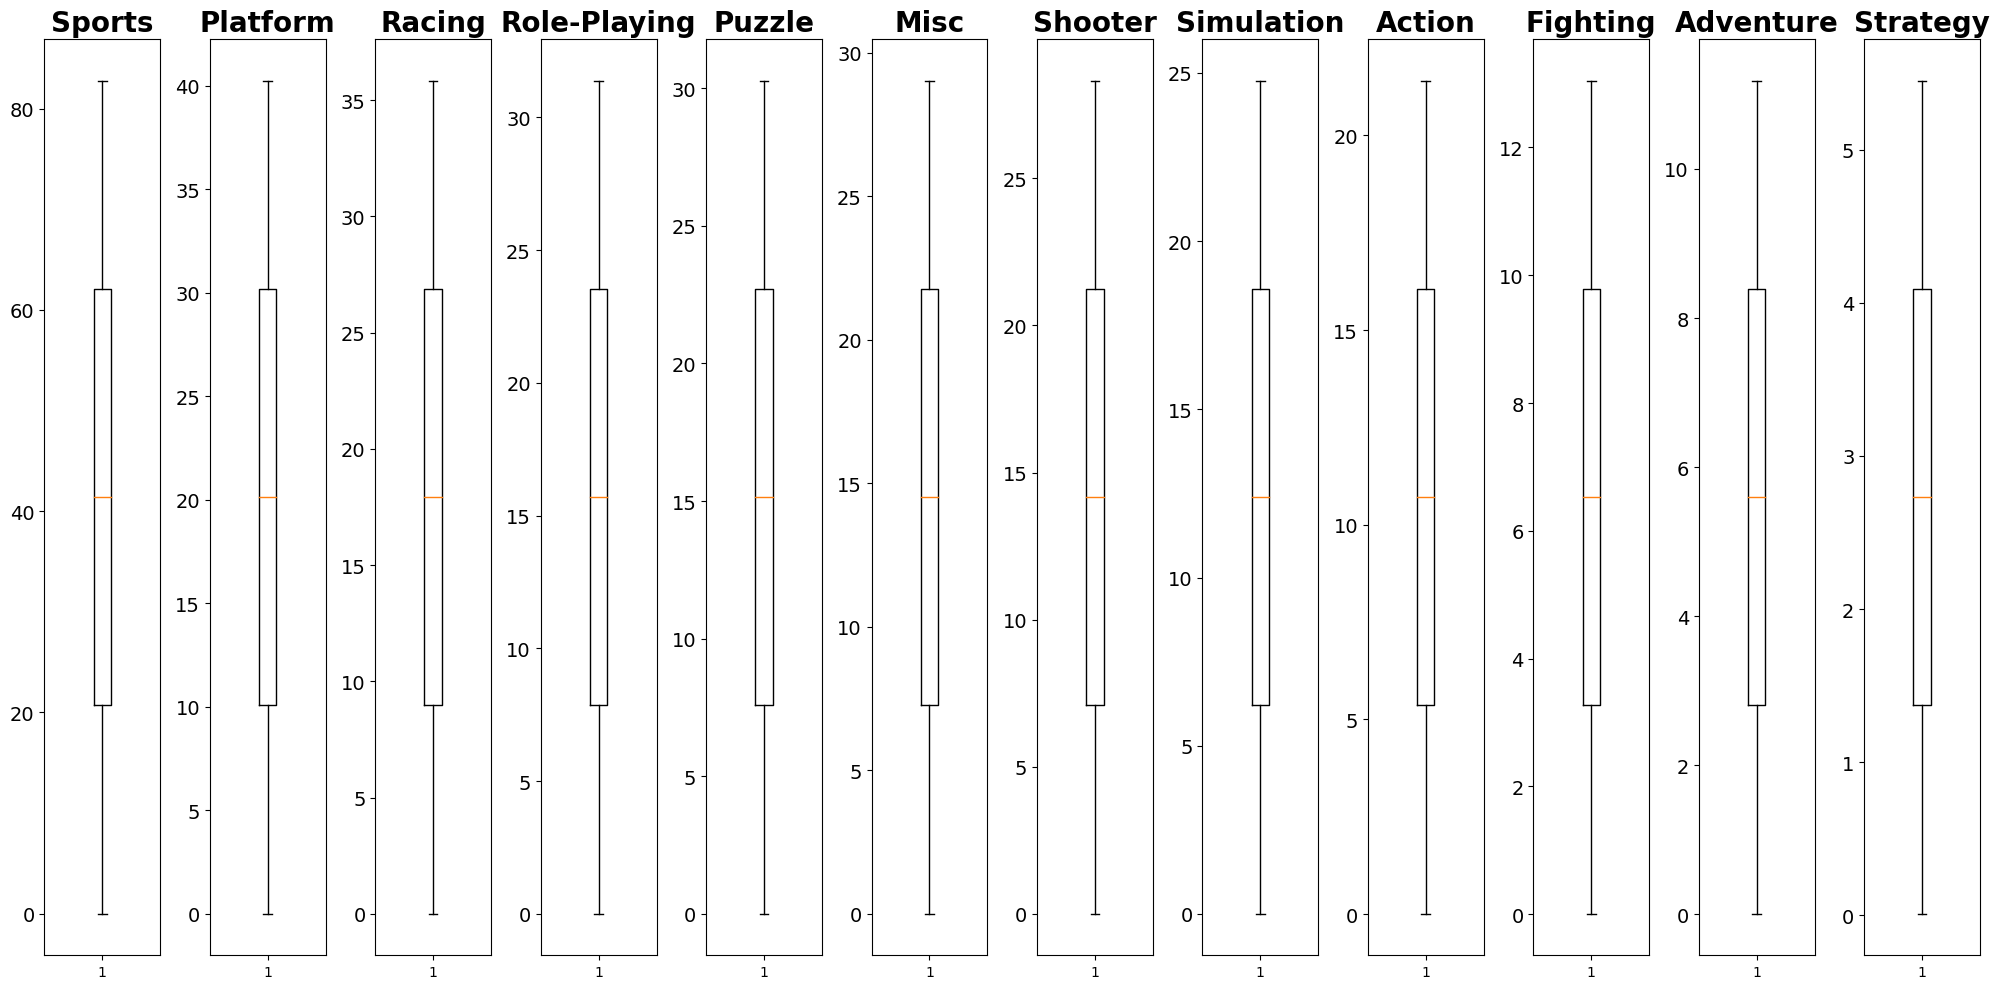

In [106]:
# %matplotlib inline

fig, axs = plt.subplots(1, num_genres, figsize = (20, 10))
genres = (x for x in games["Genre"].unique())

for i, ax in enumerate(axs.flat):
    genre = next(genres)
    global_sales = games[games["Genre"] == genre]["Global_Sales"]
    val_min = global_sales.min()
    val_max = global_sales.max()
    val_75 = global_sales.sum() * 0.75
    val_25 = global_sales.sum() * 0.25
    print(genre, val_min, val_max, val_75, val_25)
    ax.boxplot((val_min, val_max))
    ax.set_title(genre, fontsize=20, fontweight="bold")
    ax.tick_params(axis='y', labelsize=14)
plt.tight_layout()


----

c.) Find the upper outer fence thresholds for each genre (assuming hinges at the 25th and 75th percentile). Store them in a dictionary {genre:upper outer fence} called ufence.

---

In [53]:
genre_outer_fence_dict = dict()

for genre in games["Genre"].unique():
    global_sales = games[games["Genre"] == genre]["Global_Sales"]

    Q3 = global_sales.sum() * 0.75
    Q1 = global_sales.sum() * 0.25

    iqr = Q3 - Q1
    print(genre, Q3, iqr)
    upper_fence = Q3 + (1.5 * iqr)
    genre_outer_fence_dict[genre] = upper_fence


Sports 998.1975 665.4649999999999
Platform 623.5275 415.68500000000006
Racing 549.03 366.02
Role-Playing 695.5275 463.68500000000006
Puzzle 183.71249999999998 122.47499999999998
Misc 607.4700000000001 404.98000000000013
Shooter 778.0275000000001 518.6850000000002
Simulation 294.1500000000001 196.10000000000008
Action 1313.385 875.5899999999999
Fighting 336.6825 224.45499999999998
Adventure 179.27999999999997 119.51999999999998
Strategy 131.34000000000003 87.56000000000003


In [49]:
genre_outer_fence_dict

{'Sports': 1996.395,
 'Platform': 1247.0550000000003,
 'Racing': 1098.06,
 'Role-Playing': 1391.0550000000003,
 'Puzzle': 367.42499999999995,
 'Misc': 1214.9400000000005,
 'Shooter': 1556.0550000000003,
 'Simulation': 588.3000000000002,
 'Action': 2626.7699999999995,
 'Fighting': 673.365,
 'Adventure': 358.55999999999995,
 'Strategy': 262.68000000000006}

----

d.) Plot the unnormalised histogram with 20 bins for all sports games whose Global sales which are beyond the outer fence.


----


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

---- 
e.) If these are successful games - what can you say about the maximum versus the typical successful game? What are the problems with using the average (overall or just the succesful games).

---

YOUR ANSWER HERE

----

f.) Create a plot of Global Sales with a line for the following platforms per year.
- 2600, NES, SNES, GEN, N64, GC, WII, PS, PS2, PS3, PS4, X360, XB, XOne

----


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()